# Test the performance of the model

## Set working directory

In [6]:
# if get error "ImportError: No module named utils"
# change working directory

# ONLY NEED TO RUN THIS CELL ONCE

import os
#os.chdir('./stage2/FasterRCNN')
print(os.getcwd())
os.chdir('../stage2/FasterRCNN')

/Users/mingrenshen/PycharmProjects/MedImgAnalysis/stage2/FasterRCNN


OSError: [Errno 2] No such file or directory: '../stage2/FasterRCNN'

##  load the library

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
from utils import imageUtils
from utils import postProcessing
from utils import DetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
import os
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.utils import write_image
import chainer
import math
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

## load the trained Faster R-CNN model

## load the data

In [9]:
#load Data
root = './TestData'
#dataset = MultiDetectionDataset(data_dir=root, split='train')
dataset_test = DetectionDataset(data_dir=root, split='test')
bbox_label_names = ('Bleeding')

In [10]:
# DataSet Statistics
#print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_test))
print('type of defects: ', bbox_label_names)

('total number of test images: ', 10)
('type of defects: ', 'Bleeding')


## load the trained Faster R-CNN model

In [12]:
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=1, 
                            pretrained_model='./result/snapshot_model_100000.npz', 
                            ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1000, 
                        max_size=1000,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('Bleeding')

[[473. 422. 562. 493.]]


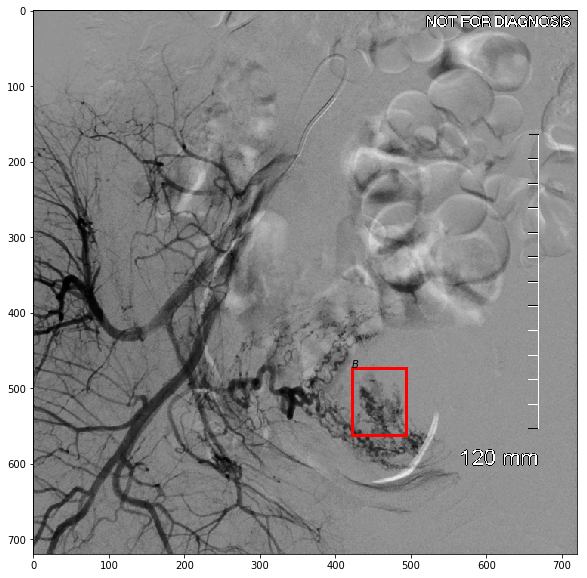

In [14]:
# Another Figure
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)
img, bbox, label = dataset_test[1]
visualization.vis_bbox(img, bbox, label, label_names=bbox_label_names, ax=ax1)
plt.show()

### plot first graphe

[[452.76013 299.48737 605.5071  545.7643 ]
 [548.7396  195.51595 626.6964  291.7826 ]
 [490.73727 115.51451 626.5685  417.9203 ]
 [463.5626  429.0257  611.26715 478.03497]
 [195.05026 129.8575  266.50916 197.59547]]
[[473. 422. 562. 493.]]


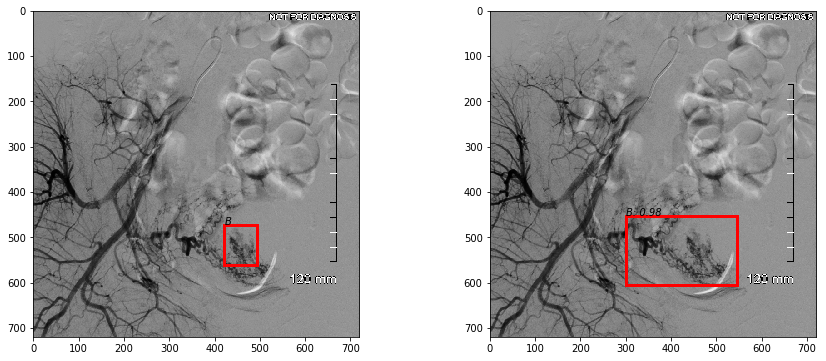

In [15]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[1]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test1.png")

[[511.4437   360.34167  625.9701   496.8401  ]
 [658.67804  108.527435 713.913    145.27388 ]]
[[504. 270. 624. 478.]]


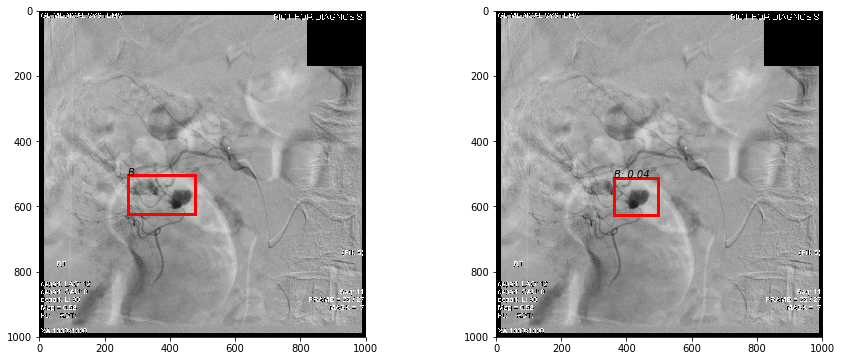

In [32]:
# Prediction of second image
img_1, bbs_1, lbs1 = dataset_test[20]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test2.png")

[[333.8536  383.49237 389.09134 437.68695]]
[[325. 379. 390. 434.]]


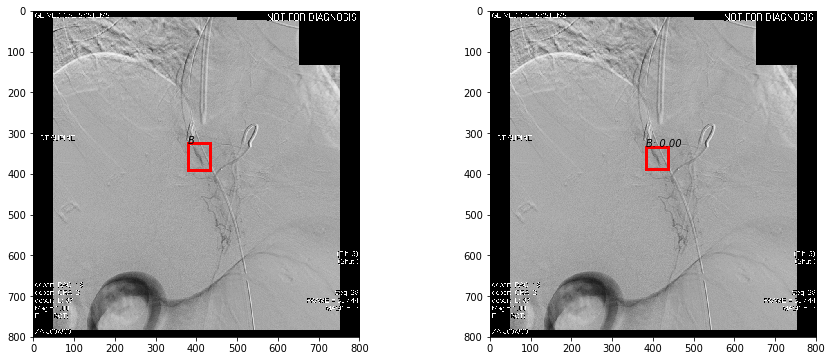

In [33]:
# Prediction of third image
img_1, bbs_1, lbs1 = dataset_test[5]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test3.png")

In [34]:
print scores

[array([0.0021717], dtype=float32)]


/Users/mingrenshen/anaconda2/envs/MedImgAnalysis/lib/python2.7/site-packages/chainercv/transforms/image/resize.py:33: RuntimeWarning: cv2 is not installed on your environment. ChainerCV will fall back on Pillow. Installation of cv2 is recommended for faster computation. 
  RuntimeWarning)


[[523.49945 450.041   613.0673  497.33005]
 [341.8099  645.68414 358.2087  668.2043 ]
 [349.05466 641.68463 365.48196 663.241  ]
 [255.07896 302.6384  272.8194  323.20096]]
[[332. 396. 400. 446.]]


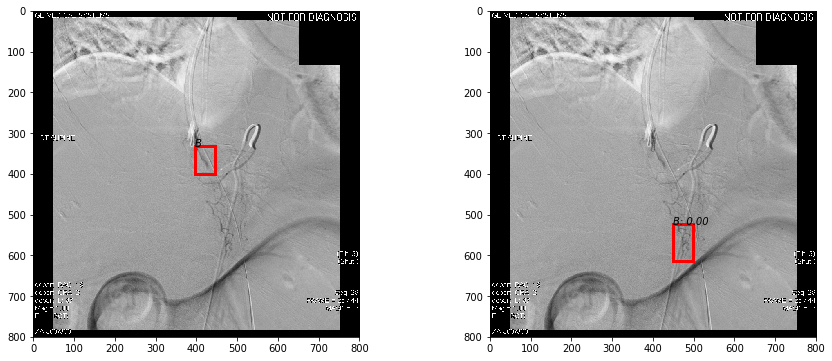

In [18]:
# Prediction of third image
img_1, bbs_1, lbs1 = dataset_test[3]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test3.png")

## loop all the testing figures to check the results

[[ 81.79134 479.73975 189.66025 547.7716 ]
 [524.8245  470.5633  650.70905 510.8405 ]
 [311.77774  95.75606 386.29538 147.10165]
 [194.93776 417.39633 250.0584  547.3248 ]
 [488.71262 121.2081  528.1397  169.3494 ]
 [431.07928 192.7476  453.66876 249.04561]]
[[305.  94. 382. 136.]]


finished image 0


[[452.76013 299.48737 605.5071  545.7643 ]
 [548.7396  195.51595 626.6964  291.7826 ]
 [490.73727 115.51451 626.5685  417.9203 ]
 [463.5626  429.0257  611.26715 478.03497]
 [195.05026 129.8575  266.50916 197.59547]]
[[473. 422. 562. 493.]]


finished image 1


[[329.83334  380.17     395.05032  472.95114 ]
 [533.9892   112.549255 561.4427   140.89182 ]
 [704.2298   266.7856   743.82294  352.18704 ]
 [549.8468   192.92566  617.85754  292.14005 ]]
[[470. 177. 621. 292.]]


finished image 2


[[587.1086  473.42197 639.97076 533.2571 ]
 [533.5096  607.81537 561.16705 646.5943 ]
 [523.4348  609.33545 545.25183 651.43774]]
[[558. 460. 644. 549.]]


finished image 3


[[301.45572  281.0542   354.63303  333.61646 ]
 [ 91.36299  227.08205  182.66127  310.69553 ]
 [ 42.363914   0.       213.60406   92.36319 ]]
[[290. 253. 360. 341.]]
finished image 4


[[176.69032  498.96063  262.97205  607.3868  ]
 [264.65485  414.96268  292.26837  441.13596 ]
 [532.86743  133.67953  576.18665  159.12067 ]
 [520.87537  121.758064 596.5299   173.67523 ]
 [271.02194  423.52014  303.45816  455.14154 ]]
[[522. 125. 588. 162.]]


finished image 5


[[701.34894 682.5677  720.0423  705.628  ]
 [652.9016  286.7437  711.01587 456.7661 ]
 [576.9163  493.7166  601.4738  516.01685]]
[[626. 250. 814. 552.]]
finished image 6


[[160.7735  138.4245  190.5409  170.112  ]
 [512.21594 315.0702  581.8353  403.86163]]
[[344. 256. 512. 429.]]
finished image 7


[[316.84372 351.6051  344.6746  374.18182]
 [346.1608  386.25095 368.22446 402.86533]
 [310.53842 353.32123 333.23203 365.47034]
 [306.18527 339.15277 347.1022  364.01526]
 [735.44965 375.95316 762.91327 423.74533]
 [269.59558 328.36462 318.22766 360.79187]
 [278.35706 317.91412 342.51447 348.67688]
 [554.91425 521.35254 595.32    663.8065 ]
 [281.5773  335.83667 312.06705 350.89825]
 [280.18118 325.95834 314.36435 341.2513 ]
 [301.94754 358.5532  341.3209  386.88065]
 [355.2691  389.1867  379.5185  418.8313 ]
 [336.91223 383.32648 358.76733 399.34753]
 [324.44122 359.41025 360.74286 394.66348]
 [327.62866 362.07675 349.29254 378.15616]
 [546.6875  539.61084 575.17163 617.5499 ]
 [303.5706  340.27417 322.88443 358.58746]
 [274.2598  347.5153  369.21695 387.6967 ]
 [289.36093 345.3697  305.0449  369.54053]
 [757.02783 365.3977  780.42285 410.6573 ]
 [344.0575  371.6954  365.5959  386.94467]
 [814.4084  587.4909  830.008   607.611  ]]
[[317. 350. 344. 373.]]


finished image 8


[[642.17554 366.38202 664.55164 391.8327 ]
 [655.0739  358.5784  673.98615 383.017  ]
 [280.68417 348.9308  310.70816 372.00885]
 [287.11673 358.12762 321.40366 384.13086]
 [661.0454  365.50253 679.0061  396.29916]
 [267.75372 334.2339  310.11475 360.27057]]
[[641. 358. 677. 402.]]
finished image 9


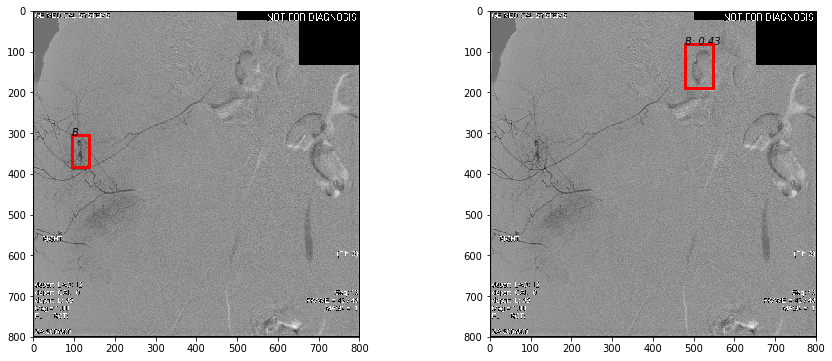

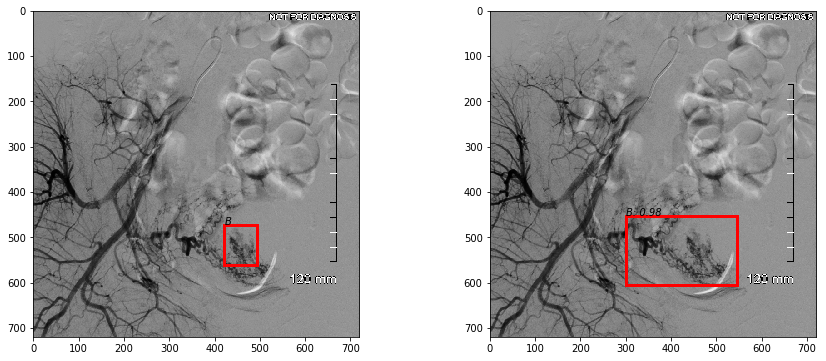

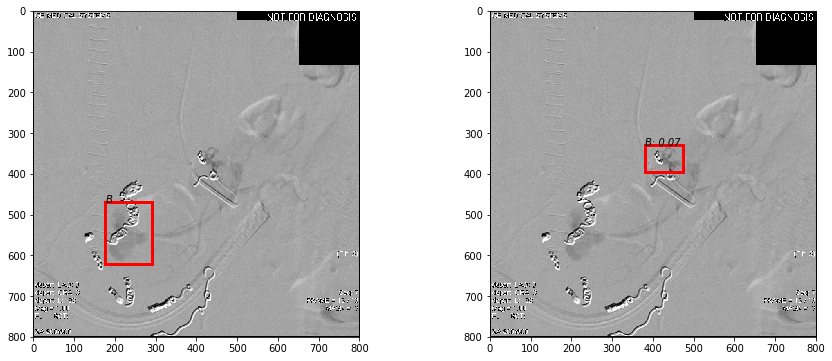

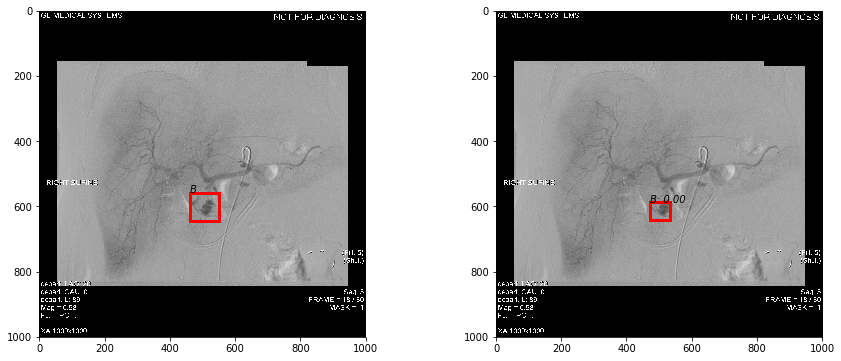

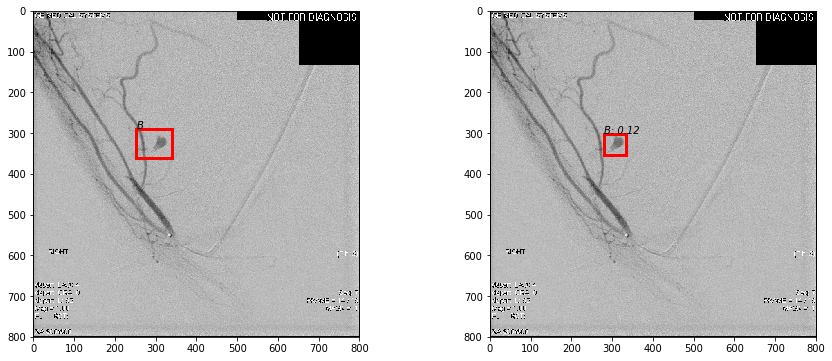

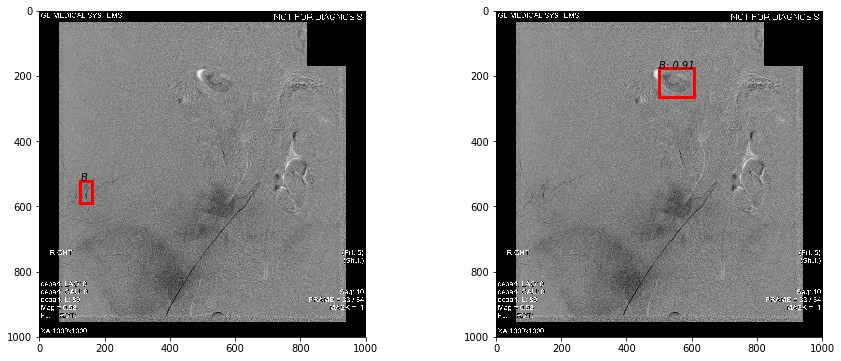

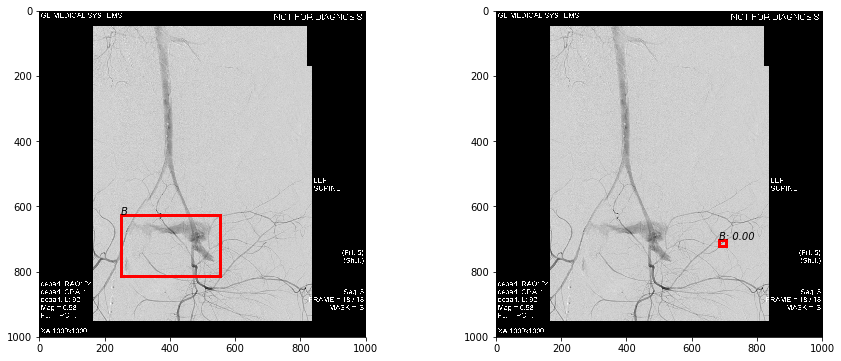

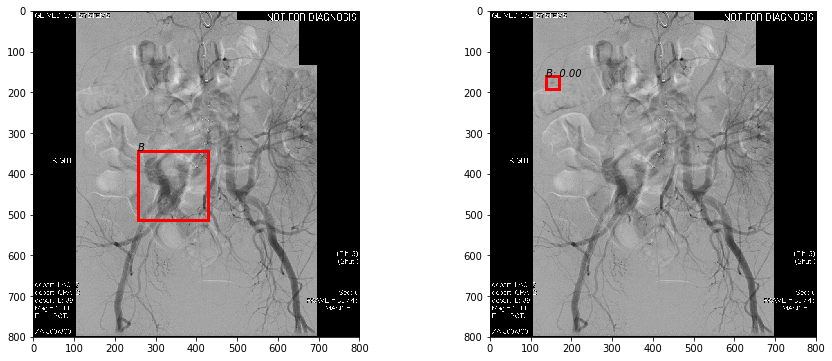

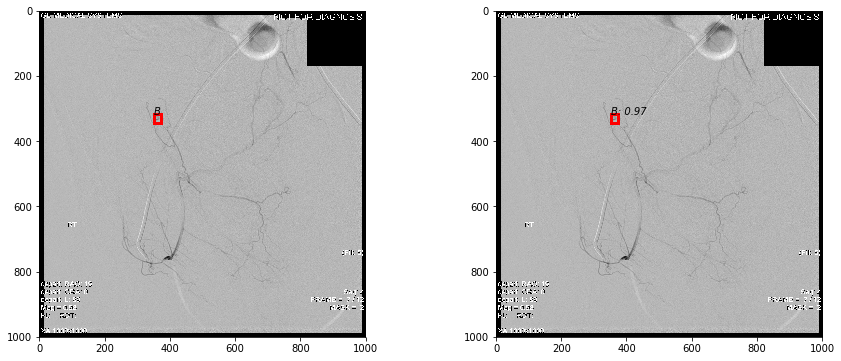

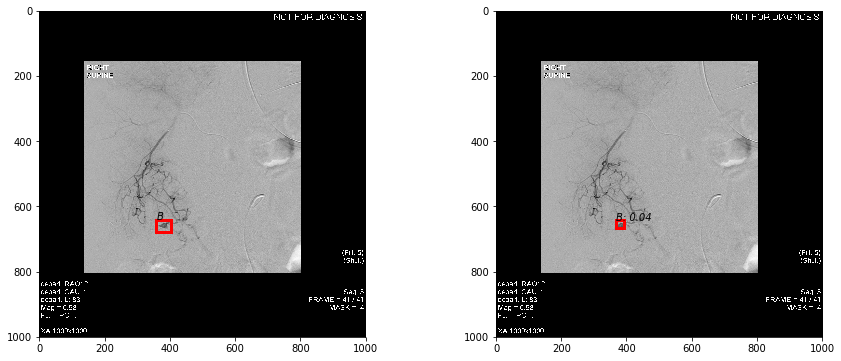

In [16]:
for i in range(0,len(dataset_test)):
	# Prediction of third image
	img_1, bbs_1, lbs1 = dataset_test[i]
	model.score_thresh = 0.0001
	bboxes, labels, scores = model.predict([img_1])
	fig = plt.figure(figsize=(15,6))
	ax1 = fig.add_subplot(1, 2, 2)
	ax2 = fig.add_subplot(1, 2, 1)
	# plot prediction
	visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
	# plot ground truth
	visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
	fig.savefig("test"+str(i)+".png")
	print("finished image %s"%str(i))